<a href="https://colab.research.google.com/github/b-fatma/S2I-DM/blob/master/src/4_feature_engineering/feature_engineering_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
input_path = '/content/drive/MyDrive/dm_fire_prediction/mergee/merged_undersampled_23_77.csv'

In [19]:
df = pd.read_csv(input_path)
df.head()

,longitude,latitude,GRIDCODE,elevation,COARSE,SAND,SILT,CLAY,BULK,REF_BULK,...,prec_winter,tmax_autumn,tmax_spring,tmax_summer,tmax_winter,tmin_autumn,tmin_spring,tmin_summer,tmin_winter,fire
0,3.744203,36.580780,30.0,365.0,9.2,38.0,41.4,20.6,1.494,1.711,...,294.55,25.42,21.83,33.00,15.17,15.33,11.50,21.17,6.25,0
1,-5.364714,29.283922,201.0,583.0,15.0,57.5,27.5,15.0,1.410,1.620,...,13.95,32.33,32.67,43.00,23.00,18.17,17.67,27.67,8.00,0
2,4.148445,30.398159,202.0,245.0,15.0,57.5,27.5,15.0,1.410,1.620,...,3.02,32.33,31.67,43.00,20.67,18.33,15.67,27.08,5.33,0
3,-1.987048,30.204261,202.0,613.0,6.9,42.1,37.0,20.9,1.469,1.725,...,5.98,31.50,32.00,43.33,20.67,17.50,16.67,27.67,5.58,0
4,-0.828221,31.629947,201.0,836.0,15.0,57.5,27.5,15.0,1.410,1.620,...,13.03,29.00,28.50,40.83,18.33,15.08,13.33,24.67,4.17,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55219 entries, 0 to 55218
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   longitude      55219 non-null  float64
 1   latitude       55219 non-null  float64
 2   GRIDCODE       55219 non-null  float64
 3   elevation      55219 non-null  float64
 4   COARSE         55219 non-null  float64
 5   SAND           55219 non-null  float64
 6   SILT           55219 non-null  float64
 7   CLAY           55219 non-null  float64
 8   BULK           55219 non-null  float64
 9   REF_BULK       55219 non-null  float64
 10  ORG_CARBON     55219 non-null  float64
 11  PH_WATER       55219 non-null  float64
 12  TOTAL_N        55219 non-null  float64
 13  CN_RATIO       55219 non-null  float64
 14  CEC_SOIL       55219 non-null  float64
 15  CEC_CLAY       55219 non-null  float64
 16  CEC_EFF        55219 non-null  float64
 17  TEB            55219 non-null  float64
 18  BSAT  

## Split before feature engineering

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler

X = df.drop(columns=['fire'])
y = df['fire']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4, stratify=y)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(49697, 38)
(5522, 38)
(49697,)
(5522,)


## Feature Selection

### Removing Correlated Features

In [23]:
numerical_columns = X_train.select_dtypes(include=['number']).columns
numerical_columns = numerical_columns.drop(['longitude', 'latitude'])
numerical_columns

Index(['GRIDCODE', 'elevation', 'COARSE', 'SAND', 'SILT', 'CLAY', 'BULK',
       'REF_BULK', 'ORG_CARBON', 'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL',
       'CEC_CLAY', 'CEC_EFF', 'TEB', 'BSAT', 'ALUM_SAT', 'ESP', 'TCARBON_EQ',
       'GYPSUM', 'ELEC_COND', 'TEXTURE_USDA', 'prec_autumn', 'prec_spring',
       'prec_summer', 'prec_winter', 'tmax_autumn', 'tmax_spring',
       'tmax_summer', 'tmax_winter', 'tmin_autumn', 'tmin_spring',
       'tmin_summer', 'tmin_winter'],
      dtype='object')

In [24]:
corr_matrix = X_train[numerical_columns].corr()
corr_matrix

,GRIDCODE,elevation,COARSE,SAND,SILT,CLAY,BULK,REF_BULK,ORG_CARBON,PH_WATER,...,prec_summer,prec_winter,tmax_autumn,tmax_spring,tmax_summer,tmax_winter,tmin_autumn,tmin_spring,tmin_summer,tmin_winter
GRIDCODE,1.000000,-0.204088,0.192669,0.656828,-0.483259,-0.663710,-0.214700,-0.650938,-0.708318,0.485737,...,-0.573343,-0.735901,0.643039,0.714213,0.733073,0.596107,0.544665,0.639198,0.705037,0.139248
elevation,-0.204088,1.000000,0.053193,-0.108284,0.120760,0.076515,0.072839,0.099330,0.139938,0.051760,...,0.694883,0.131591,-0.625061,-0.524757,-0.468572,-0.617654,-0.788502,-0.662977,-0.601002,-0.766147
COARSE,0.192669,0.053193,1.000000,0.569117,-0.618615,-0.415022,-0.193435,-0.422258,-0.110037,0.054130,...,-0.081552,-0.205190,0.084851,0.126681,0.177292,0.062316,0.073896,0.115551,0.173252,-0.028292
SAND,0.656828,-0.108284,0.569117,1.000000,-0.858772,-0.911968,-0.278852,-0.927265,-0.695681,0.334677,...,-0.459804,-0.642095,0.516900,0.582614,0.613769,0.449963,0.435847,0.512872,0.574775,0.071203
SILT,-0.483259,0.120760,-0.618615,-0.858772,1.000000,0.572972,0.110798,0.632016,0.519884,-0.194730,...,0.386738,0.534193,-0.409674,-0.449160,-0.469668,-0.352919,-0.346732,-0.389693,-0.427579,-0.075144
CLAY,-0.663710,0.076515,-0.415022,-0.911968,0.572972,1.000000,0.357335,0.977191,0.696533,-0.379427,...,0.425835,0.599359,-0.498802,-0.572301,-0.605715,-0.437173,-0.419548,-0.508358,-0.577043,-0.053727
BULK,-0.214700,0.072839,-0.193435,-0.278852,0.110798,0.357335,1.000000,0.316041,0.183374,-0.045125,...,0.116098,0.234633,-0.126504,-0.154778,-0.180435,-0.131526,-0.139041,-0.174510,-0.198894,-0.116884
REF_BULK,-0.650938,0.099330,-0.422258,-0.927265,0.632016,0.977191,0.316041,1.000000,0.681024,-0.328603,...,0.423667,0.570503,-0.487670,-0.558395,-0.589328,-0.433387,-0.420262,-0.505070,-0.569090,-0.083989
ORG_CARBON,-0.708318,0.139938,-0.110037,-0.695681,0.519884,0.696533,0.183374,0.681024,1.000000,-0.739145,...,0.466813,0.761884,-0.563332,-0.626978,-0.654395,-0.492553,-0.462586,-0.543728,-0.595729,-0.091590
PH_WATER,0.485737,0.051760,0.054130,0.334677,-0.194730,-0.379427,-0.045125,-0.328603,-0.739145,1.000000,...,-0.195459,-0.662331,0.252286,0.319899,0.375221,0.186145,0.163489,0.235504,0.300874,-0.082355


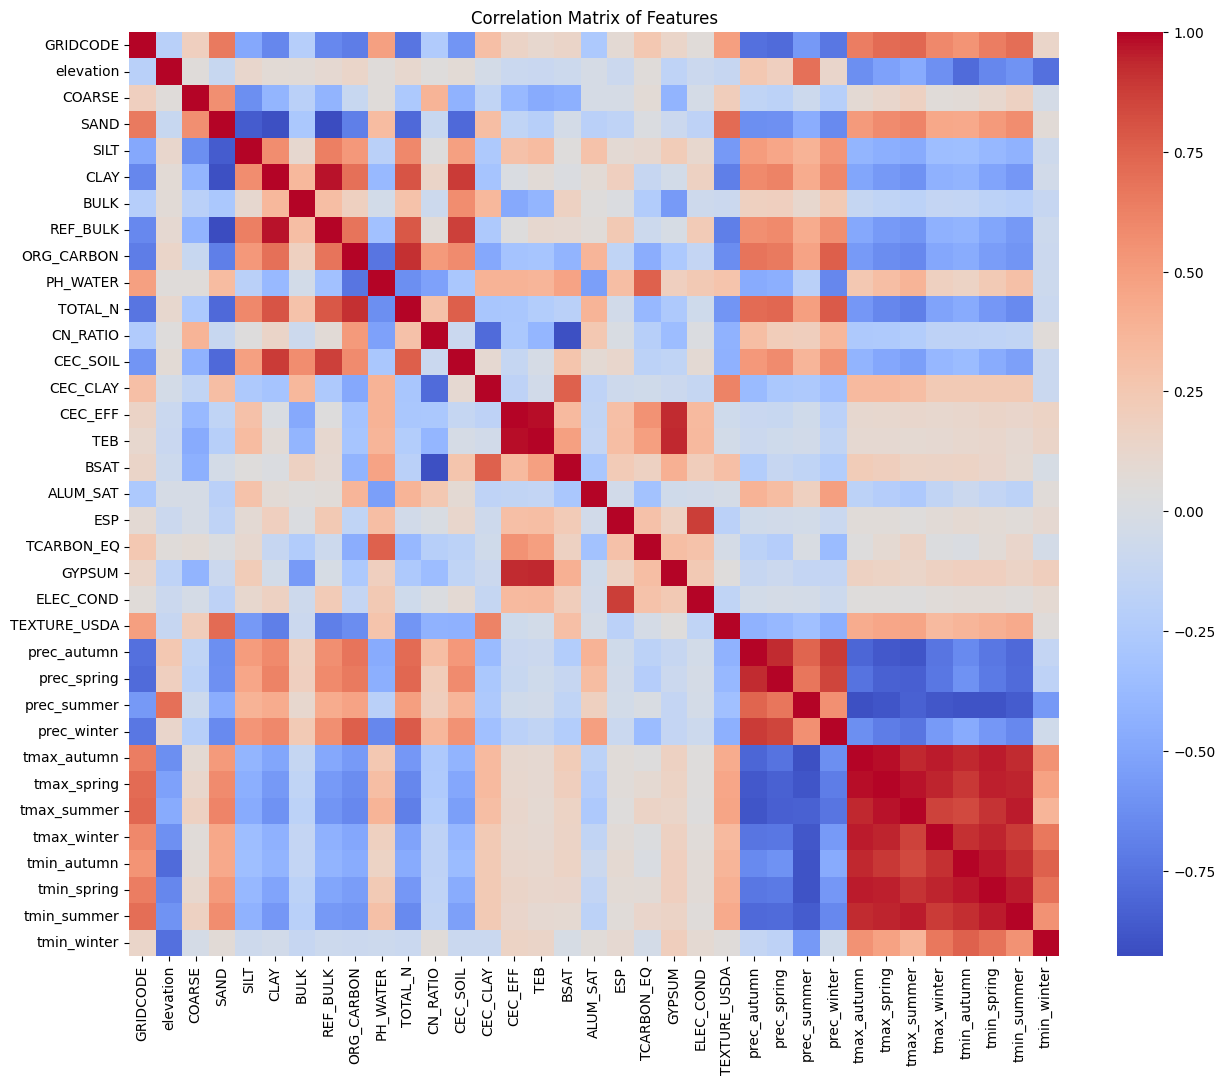

In [25]:
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

Extracting highly linearly correlated feature pairs (corr > 0.95)

In [26]:
threshold = 0.95

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than threshold
strong_corr_pairs = [(col, row, upper.loc[row, col])
                     for col in upper.columns
                     for row in upper.index
                     if (upper.loc[row, col] > threshold)]

strong_corr_df = pd.DataFrame(strong_corr_pairs, columns=['Feature_1', 'Feature_2', 'Correlation'])

print(strong_corr_df)

     Feature_1    Feature_2  Correlation
0     REF_BULK         CLAY     0.977191
1          TEB      CEC_EFF     0.983102
2  tmax_spring  tmax_autumn     0.982471
3  tmax_summer  tmax_spring     0.970313
4  tmax_winter  tmax_autumn     0.958400
5  tmin_spring  tmax_autumn     0.957158
6  tmin_spring  tmax_spring     0.952792
7  tmin_spring  tmin_autumn     0.963900
8  tmin_summer  tmax_summer     0.959645
9  tmin_summer  tmin_spring     0.961529


#### `REF_BULK` and `CLAY`

The pair CLAY–REF_BULK shows a very high correlation (r ≈ 0.98), meaning they carry almost the same information. However, CLAY should be kept and REF_BULK removed for the following reasons:

📌 1. Direct relevance to USDA soil texture classification

The USDA texture class is explicitly defined using particle-size fractions, including the proportion of clay-sized particles (< 2 μm).

Clay percentage directly determines whether a soil is “Clay,” “Silty Clay,” “Clay Loam,” etc.

It is a primary classification variable in pedology.

Because clay content is baked into the very rules of soil texture classes, it has direct predictive power for anything related to soil behavior, water retention, and possibly fire susceptibility.

📌 2. CLAY is a primary physical soil property; REF_BULK is a derived structural property

Clay % is a fundamental intrinsic property tied to mineral composition.

Reference bulk density reflects how tightly particles are packed, which is influenced by clay content, organic matter, and structure.

REF_BULK is therefore a secondary property, and its high correlation with CLAY is expected because clay-rich soils have lower bulk density due to high porosity.
When two variables reflect the same phenomenon, we keep the more fundamental and directly interpretable one.

📌 3. CLAY is more stable and consistent across datasets

Clay percentage is measured or estimated consistently in global datasets like WISE30sec.

Reference bulk density varies more due to local compaction, management practices, and measurement methods.

Keeping the more universally standardized feature enhances model robustness.

📌 4. CLAY aligns better with soil processes relevant to fire prediction

Clay content influences:

water retention

infiltration

drying rate

heat propagation

vegetation type and fuel structure

Bulk density indirectly reflects some of these via porosity, but clay does so more directly.

Thus, CLAY has clearer mechanistic relevance for fire risk modeling.

📌 Conclusion

CLAY should be retained because it is the primary soil property defining texture, has direct physical meaning, is more stable, and is central to soil classification systems such as the USDA texture classes.
Reference bulk density is derivative, less fundamental, and redundant given the very high correlation.

In [27]:
X_train.drop(columns=['REF_BULK'], inplace=True)

#### `CLAY` and `TEXTURE_USDA` statistical test

In [28]:
df['TEXTURE_USDA'].value_counts()

,count
TEXTURE_USDA,
9.0,32909
11.0,16215
5.0,5637
12.0,299
10.0,92
3.0,67


here the appropriate test is an ANOVA test, to check whether point estimates (mean) of CLAY change accros groups of TEXTURE_USDA.

In [29]:
df.groupby('TEXTURE_USDA')['CLAY'].describe()


,count,mean,std,min,25%,50%,75%,max
TEXTURE_USDA,,,,,,,,
3.0,67.0,50.746269,0.993819,50.0,50.0,50.75,50.75,54.0
5.0,5637.0,28.607539,3.958978,14.8,26.3,27.40,29.70,50.8
9.0,32909.0,17.137513,3.476515,13.8,15.0,16.30,17.20,47.2
10.0,92.0,24.050543,2.388014,18.2,24.0,24.00,24.05,29.0
11.0,16215.0,16.050607,1.702932,12.6,16.0,16.00,16.10,43.2
12.0,299.0,11.927425,2.141144,9.2,11.4,11.40,11.40,23.2


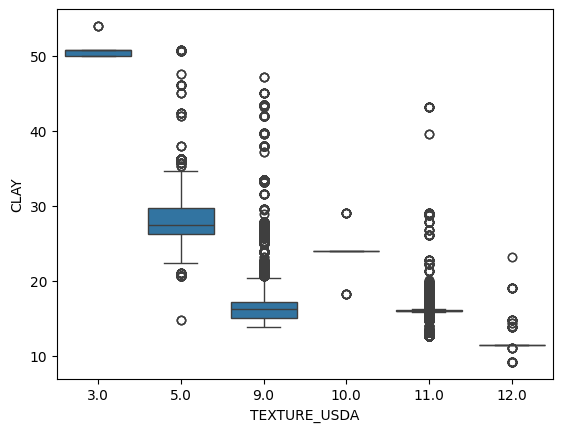

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='TEXTURE_USDA', y='CLAY')
plt.show()

The feature is imbalanced, it is derived from:
- Clay %
- Silt %
- Sand %

I'm just dropping it

In [31]:
X_train.drop(columns=['TEXTURE_USDA'], inplace=True)

#### `CLAY` and `TEXTURE_SOTER` statistical test

In [32]:
X_train['TEXTURE_SOTER'].value_counts()

,count
TEXTURE_SOTER,
M,47688
C,1378
F,631


M dominates the dataset, better to drop this attribute, since meaning is captured by other features.

In [33]:
import pandas as pd
import scipy.stats as stats

contingency = pd.crosstab(X_train['TEXTURE_SOTER'], y_train)
print(contingency)

chi2, p, dof, expected = stats.chi2_contingency(contingency)
print("Chi-square:", chi2)
print("p-value:", p)

fire               0      1
TEXTURE_SOTER              
C               1188    190
F                451    180
M              36589  11099
Chi-square: 78.5770256489519
p-value: 8.653975834726805e-18


In [34]:
X_train.drop(columns=['TEXTURE_SOTER'], inplace=True)


#### `TEB` and `CEC_EFF`

TEB (Total Exchangeable Bases)

Sum of base cations:

Ca²⁺

Mg²⁺

K⁺

Na⁺

It measures base saturation, soil fertility, and nutrient storage.

CEC_EFF (Effective Cation Exchange Capacity, ECEC)

Sum of:

Ca²⁺

Mg²⁺

K⁺

Na⁺ (same as TEB)
PLUS:

exchangeable acidity

H⁺

Al³⁺

So:

CEC_EFF = TEB + exchangeable acidity

=> Drop TEB since it's already contained within CEC_EFF

In [35]:
X_train.drop(columns=['TEB'], inplace=True)

#### Temperatures

4 seasons are overkill, reducing to 2 seasons (warm and cool)

In [36]:
tmax_cols = ['tmax_spring', 'tmax_summer', 'tmax_autumn', 'tmax_winter']
tmin_cols = ['tmin_spring', 'tmin_summer', 'tmin_autumn', 'tmin_winter']

# Warm season: Spring + Summer
X_train['tmax_warm'] = X_train[['tmax_spring', 'tmax_summer']].mean(axis=1)
X_train['tmin_warm'] = X_train[['tmin_spring', 'tmin_summer']].mean(axis=1)

# Cool season: Autumn + Winter
X_train['tmax_cool'] = X_train[['tmax_autumn', 'tmax_winter']].mean(axis=1)
X_train['tmin_cool'] = X_train[['tmin_autumn', 'tmin_winter']].mean(axis=1)

X_train = X_train.drop(columns=tmax_cols + tmin_cols)

print(X_train[['tmax_warm','tmax_cool','tmin_warm','tmin_cool']].head())


       tmax_warm  tmax_cool  tmin_warm  tmin_cool
32268     29.835     22.915      16.75     11.335
32792     38.460     27.250      23.50     13.750
15247     30.835     23.290      17.17     11.875
39752     30.585     19.330      15.29      6.670
30126     38.125     27.085      21.17     11.750


#### Wrap-up

In [37]:
corr_matrix = X_train.corr()
threshold = 0.9

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than threshold
strong_corr_pairs = [(col, row, upper.loc[row, col])
                     for col in upper.columns
                     for row in upper.index
                     if (upper.loc[row, col] > threshold)]

strong_corr_df = pd.DataFrame(strong_corr_pairs, columns=['Feature_1', 'Feature_2', 'Correlation'])

print(strong_corr_df)

     Feature_1    Feature_2  Correlation
0      TOTAL_N   ORG_CARBON     0.913962
1       GYPSUM      CEC_EFF     0.924828
2  prec_spring  prec_autumn     0.931772
3    tmin_warm    tmax_warm     0.958876
4    tmax_cool    tmax_warm     0.951874
5    tmax_cool    tmin_warm     0.948259


In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49697 entries, 32268 to 546
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   longitude    49697 non-null  float64
 1   latitude     49697 non-null  float64
 2   GRIDCODE     49697 non-null  float64
 3   elevation    49697 non-null  float64
 4   COARSE       49697 non-null  float64
 5   SAND         49697 non-null  float64
 6   SILT         49697 non-null  float64
 7   CLAY         49697 non-null  float64
 8   BULK         49697 non-null  float64
 9   ORG_CARBON   49697 non-null  float64
 10  PH_WATER     49697 non-null  float64
 11  TOTAL_N      49697 non-null  float64
 12  CN_RATIO     49697 non-null  float64
 13  CEC_SOIL     49697 non-null  float64
 14  CEC_CLAY     49697 non-null  float64
 15  CEC_EFF      49697 non-null  float64
 16  BSAT         49697 non-null  float64
 17  ALUM_SAT     49697 non-null  float64
 18  ESP          49697 non-null  float64
 19  TCARBON

clay + silt + sand = 100

In [39]:
(X_train['CLAY'] + X_train['SILT'] + X_train['SAND']).value_counts()

,count
100.0,45731
100.0,2897
100.0,859
100.0,209
100.0,1


1️⃣ Clay

Tiny, tiny bits of dirt — so small you can’t see them.

Feels sticky when wet and hard when dry or baked.

Holds lots of water because the tiny bits pack together tightly.

Think: like flour in dough — soft, sticky, holds water.

2️⃣ Silt

A bit bigger than clay, but still very small.

Feels smooth and slippery, kind of like baby powder.

Holds some water, but not as much as clay.

Think: like powdered sugar — soft, smooth, not sticky.

3️⃣ Sand

Big bits of dirt you can see and feel.

Feels gritty and drains water quickly.

Doesn’t stick together well.

Think: like beach sand — rough, loose, lets water flow through.

All soil is made by mixing clay + silt + sand in different amounts.

More clay → sticky soil, holds water → **harder for fire to start**

More sand → dry, drains fast → **easier for fire to start**

More silt → smooth soil, somewhere in between

=> drop silt, and keep clay and sand since (1) they hold more predictive power and (2) silt can be extracted from the 2 impilictly because of perfect linearity.

In [40]:
X_train.drop(columns=['SILT'], inplace=True)

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49697 entries, 32268 to 546
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   longitude    49697 non-null  float64
 1   latitude     49697 non-null  float64
 2   GRIDCODE     49697 non-null  float64
 3   elevation    49697 non-null  float64
 4   COARSE       49697 non-null  float64
 5   SAND         49697 non-null  float64
 6   CLAY         49697 non-null  float64
 7   BULK         49697 non-null  float64
 8   ORG_CARBON   49697 non-null  float64
 9   PH_WATER     49697 non-null  float64
 10  TOTAL_N      49697 non-null  float64
 11  CN_RATIO     49697 non-null  float64
 12  CEC_SOIL     49697 non-null  float64
 13  CEC_CLAY     49697 non-null  float64
 14  CEC_EFF      49697 non-null  float64
 15  BSAT         49697 non-null  float64
 16  ALUM_SAT     49697 non-null  float64
 17  ESP          49697 non-null  float64
 18  TCARBON_EQ   49697 non-null  float64
 19  GYPSUM 

In [42]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

mi = mutual_info_classif(X_train, y_train, random_state=42)

mi_series = pd.Series(mi, index=X_train.columns).sort_values(ascending=False)
print(mi_series)


latitude       0.436606
longitude      0.428349
prec_spring    0.324177
prec_autumn    0.293990
prec_winter    0.281396
prec_summer    0.178418
tmin_warm      0.169411
elevation      0.166167
tmax_warm      0.158543
tmax_cool      0.146175
tmin_cool      0.142032
ORG_CARBON     0.101966
TOTAL_N        0.101070
TCARBON_EQ     0.100501
GYPSUM         0.097414
CEC_CLAY       0.097040
BULK           0.096063
SAND           0.095897
PH_WATER       0.093112
CEC_EFF        0.085673
CLAY           0.085581
COARSE         0.081273
CEC_SOIL       0.071214
ESP            0.070052
BSAT           0.065535
CN_RATIO       0.041835
ELEC_COND      0.037686
GRIDCODE       0.017378
ALUM_SAT       0.002032
dtype: float64


consider dropping elec_cond and alum_sat

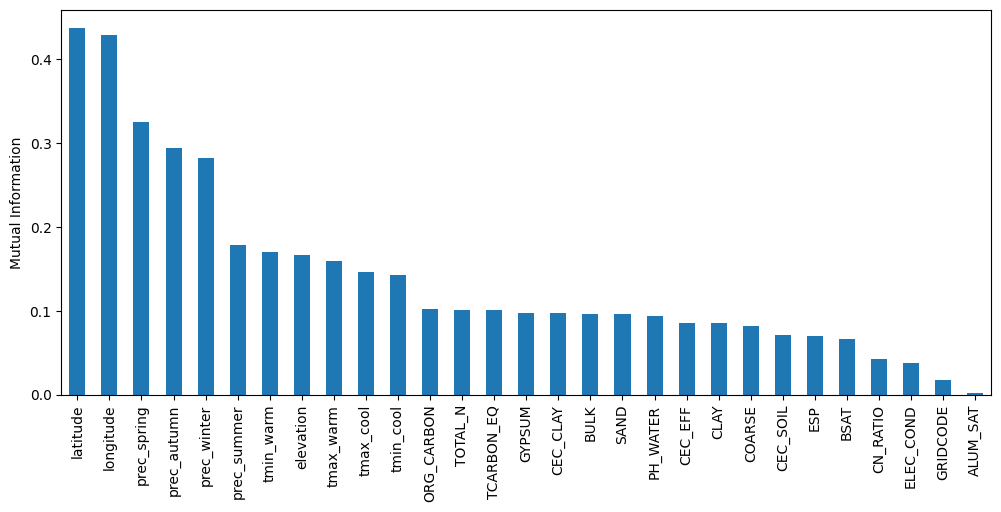

In [43]:
import matplotlib.pyplot as plt

mi_series.sort_values(ascending=False).plot(kind='bar', figsize=(12,5))
plt.ylabel("Mutual Information")
plt.show()

In [44]:
X_train.drop(columns=['ALUM_SAT'], inplace=True)

### Removing Features not relevant to the task

### Feature Engineering

#### Scaling

In [45]:
stats = X_train.describe()

In [46]:
stats.iloc[:, :10]

,longitude,latitude,GRIDCODE,elevation,COARSE,SAND,CLAY,BULK,ORG_CARBON,PH_WATER
count,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000
mean,3.911465,31.681784,176.752339,453.705837,11.726603,52.208463,18.023978,1.425451,0.762773,7.806724
std,4.377026,2.786926,55.315275,305.861056,3.522081,7.907959,4.943670,0.038326,0.343263,0.345384
min,-8.118050,27.222780,14.000000,-30.000000,2.000000,15.000000,9.200000,1.110000,0.361000,4.960000
25%,0.707898,29.213381,200.000000,209.000000,9.300000,49.400000,15.000000,1.410000,0.616000,7.800000
50%,4.860430,31.401550,201.000000,407.000000,12.000000,55.000000,16.100000,1.430000,0.649200,7.800000
75%,7.211700,33.955534,202.000000,599.000000,15.000000,57.500000,17.400000,1.446000,0.704000,7.920000
max,11.110389,37.323460,210.000000,2138.000000,37.600000,79.500000,54.000000,1.760000,4.192600,8.600000


In [47]:
stats.iloc[:, 10:20]

,TOTAL_N,CN_RATIO,CEC_SOIL,CEC_CLAY,CEC_EFF,BSAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND
count,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000
mean,0.798099,9.913076,13.101358,61.009646,36.569198,92.766998,4.971178,9.331054,4.148002,1.678760
std,0.206476,0.937588,3.224482,11.068044,16.130813,7.807769,7.380422,2.886357,7.529559,2.360461
min,0.446000,8.000000,5.800000,26.800000,9.000000,28.600000,1.000000,0.000000,0.060000,0.100000
25%,0.690000,9.000000,10.000000,51.000000,30.500000,82.000000,2.500000,8.000000,0.250000,1.000000
50%,0.730000,9.600000,13.000000,61.000000,31.500000,97.400000,3.000000,9.920000,2.200000,1.000000
75%,0.787000,11.000000,13.900000,73.100000,35.000000,99.400000,4.200000,10.220000,4.000000,1.300000
max,2.962000,18.050000,40.150000,83.000000,143.000000,100.000000,67.000000,27.059999,57.599998,32.000000


#### Transform skewed data

In [48]:
# Get numerical columns
numerical_columns = X_train.select_dtypes(include=['number']).columns
# Drop categorical columns
numerical_columns = numerical_columns.drop(['GRIDCODE'])
numerical_columns

Index(['longitude', 'latitude', 'elevation', 'COARSE', 'SAND', 'CLAY', 'BULK',
       'ORG_CARBON', 'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY',
       'CEC_EFF', 'BSAT', 'ESP', 'TCARBON_EQ', 'GYPSUM', 'ELEC_COND',
       'prec_autumn', 'prec_spring', 'prec_summer', 'prec_winter', 'tmax_warm',
       'tmin_warm', 'tmax_cool', 'tmin_cool'],
      dtype='object')

In [49]:
numerical_0s = X_train.loc[:, (X_train == 0).any()].select_dtypes(include=['number']).columns
numerical_0s

Index(['elevation', 'TCARBON_EQ', 'prec_summer'], dtype='object')

In [50]:
numerical_neg = X_train.loc[:, (X_train < 0).any()].select_dtypes(include=['number']).columns
numerical_neg

Index(['longitude', 'elevation'], dtype='object')

In [51]:
# # Identify columns containing zeros
# numerical_0s = df.loc[:, (df <= 0).any()].select_dtypes(include=['number']).columns

# # Remove columns that contain zeros from consideration
# numerical_columns = numerical_columns.difference(numerical_0s)

# Calculate skewness for the remaining numerical columns
skewness = X_train[numerical_columns].skew()

# Set threshold for skewness
skewed_columns = skewness[abs(skewness) > 2]

# Display skewed columns
print("Skewed Columns:")
print(skewed_columns)

Skewed Columns:
CLAY           2.571048
ORG_CARBON     2.741003
PH_WATER      -2.908470
TOTAL_N        2.370394
CEC_SOIL       2.546003
CEC_EFF        2.819759
ESP            5.600108
GYPSUM         3.306564
ELEC_COND      7.360054
prec_winter    3.489768
dtype: float64


Since there are values <= 0, we will use a shifted version of log1p to get strictly positive values.

In [52]:
from sklearn.preprocessing import FunctionTransformer, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

def shifted_log1p(x):
    # shift each column independently
    return np.log1p(x - np.min(x, axis=0) + 1)

log_transformer = FunctionTransformer(shifted_log1p, validate=False)

preprocess = ColumnTransformer([
    ('log', Pipeline([
        ('log', log_transformer),
        ('scale', RobustScaler())
    ]), skewed_columns.index.tolist()),

    ('scale_only', RobustScaler(), X_train.columns.difference(skewed_columns.index).tolist())
])

X_train_scaled = preprocess.fit_transform(X_train)
X_train_scaled

array([[ 4.13691604e+00,  1.11978037e+01, -1.61360025e+01, ...,
        -1.11906677e+00, -2.90393013e-01, -9.98890122e-01],
       [ 1.29590834e+00,  0.00000000e+00,  2.77204515e+00, ...,
         2.68704747e-01,  7.64192140e-01,  4.99445061e-01],
       [ 2.37937037e+00,  2.34794138e+00, -3.61418304e+00, ...,
        -9.58165728e-01, -5.45851528e-02, -9.05660377e-01],
       ...,
       [-4.91782534e-01,  6.18216604e-01, -2.10905205e-06, ...,
         5.39018504e-02, -2.18340611e-01,  1.88679245e-02],
       [ 3.59090723e-01, -9.83612488e-02,  8.42745436e-02, ...,
         1.61705551e-01,  5.08733624e-01,  3.15205327e-01],
       [-4.91782534e-01,  6.18216604e-01, -2.10905205e-06, ...,
        -4.66613033e-02, -1.46288210e-01, -9.32297447e-02]])

In [53]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.describe()

,longitude,latitude,GRIDCODE,elevation,COARSE,SAND,CLAY,BULK,ORG_CARBON,PH_WATER,...,GYPSUM,ELEC_COND,prec_autumn,prec_spring,prec_summer,prec_winter,tmax_warm,tmin_warm,tmax_cool,tmin_cool
count,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,...,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000
mean,0.466586,1.048132,-0.066520,0.613189,-0.074991,0.525626,0.408961,0.041650,1.348179,0.258874,...,0.119759,0.059094,-0.145909,0.391241,0.481566,0.472264,-0.246871,-0.293924,-0.187695,-0.241257
std,1.286973,3.204713,3.320157,1.903529,0.609519,2.345069,1.382299,0.705029,3.231336,0.867789,...,0.784259,0.587692,0.672995,0.893322,1.101000,0.853098,0.709689,0.676719,0.861159,0.698933
min,-5.565056,-3.516474,-36.085335,-3.137683,-3.127253,-14.300613,-1.750833,-0.729147,-3.774515,-1.296647,...,-1.120513,-0.881197,-1.995522,-0.358458,-0.463792,-0.248128,-2.980892,-2.466613,-3.855895,-2.820200
25%,-0.491783,-0.381783,-0.000002,-0.417511,-0.808741,-0.237852,-0.337289,-0.638193,0.000000,-0.251965,...,-0.507692,-0.461429,-0.638478,-0.249202,-0.231896,-0.130481,-0.698514,-0.777957,-0.563319,-0.684795
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.508217,0.618217,0.999998,0.582489,0.191259,0.762148,0.662711,0.361807,1.000000,0.748035,...,0.492308,0.538571,0.361522,0.750798,0.768104,0.869519,0.301486,0.222043,0.436681,0.315205
max,6.187308,24.437630,6.245931,16.108865,2.815635,9.782773,7.156465,2.671810,24.976660,2.992483,...,4.438462,1.248781,0.960970,5.272526,6.718877,3.781818,1.000000,0.650845,1.510917,0.749168


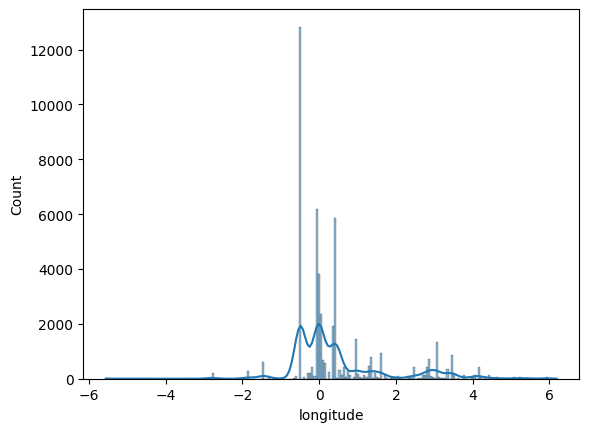

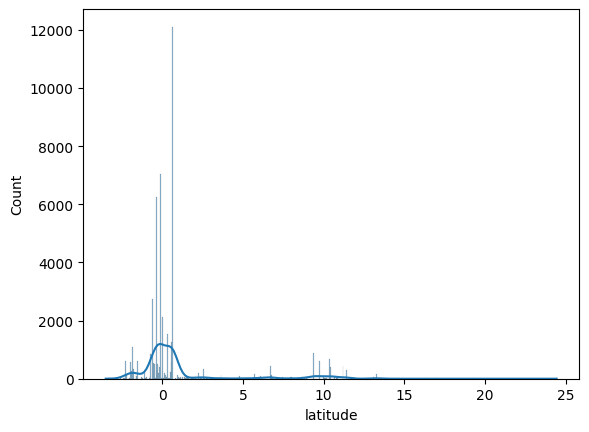

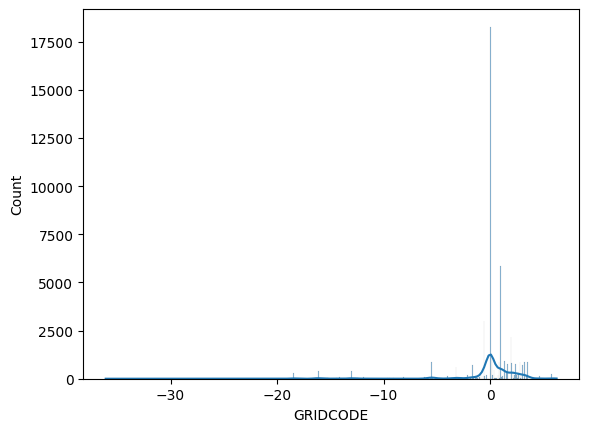

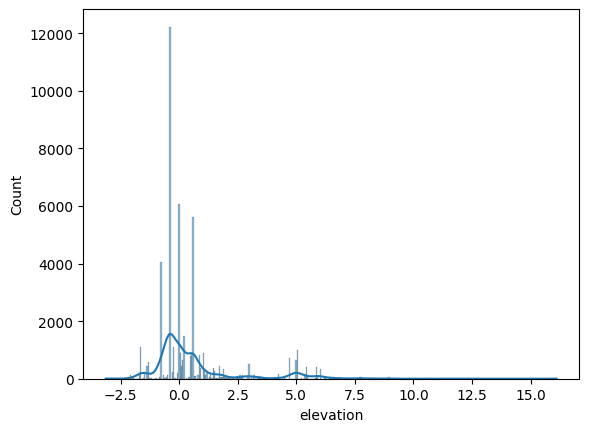

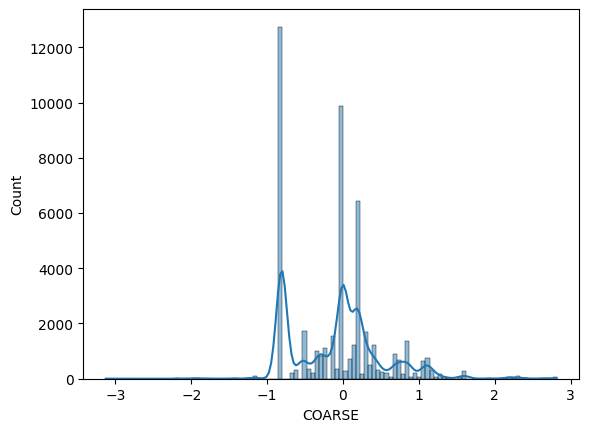

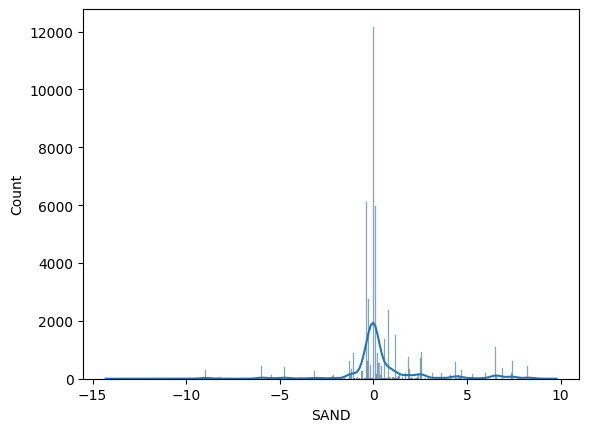

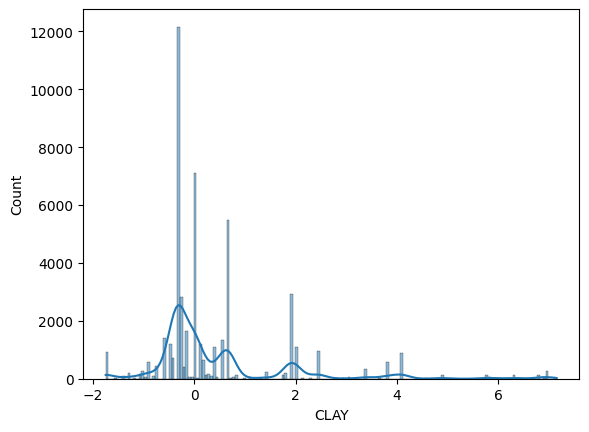

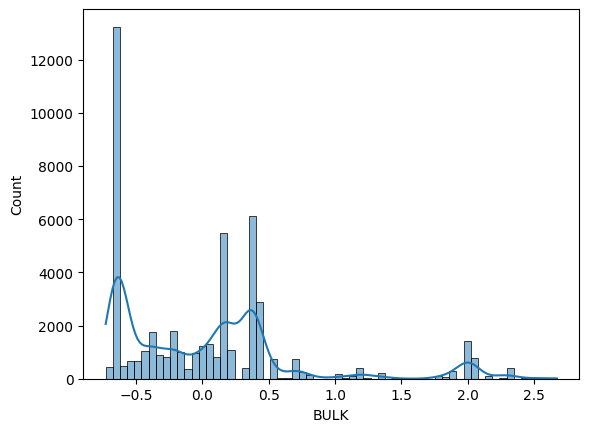

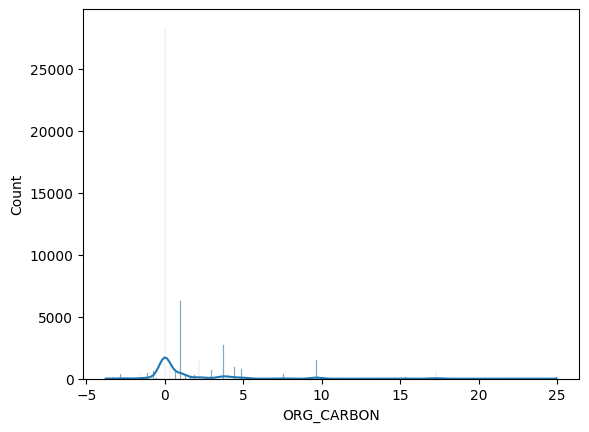

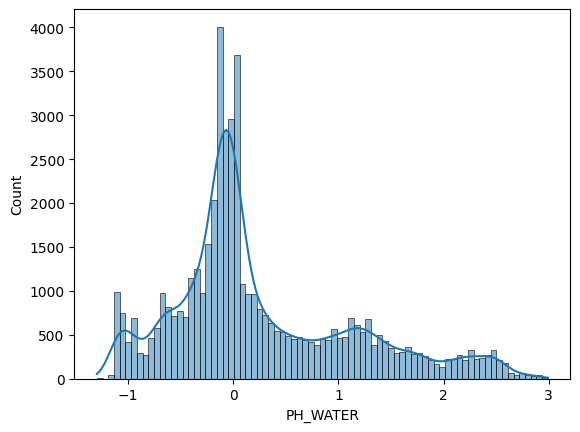

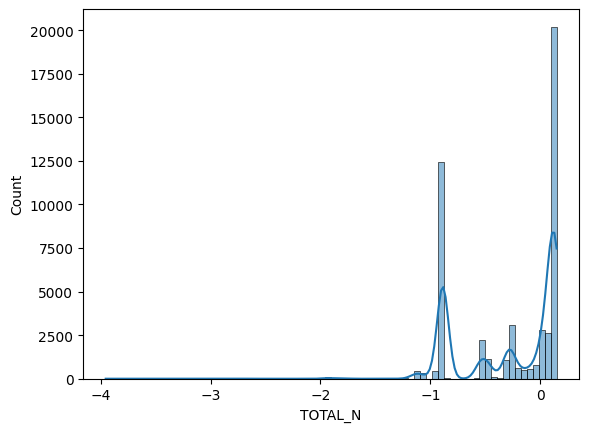

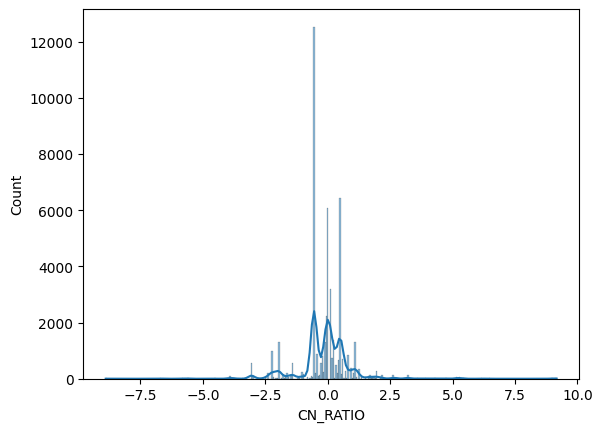

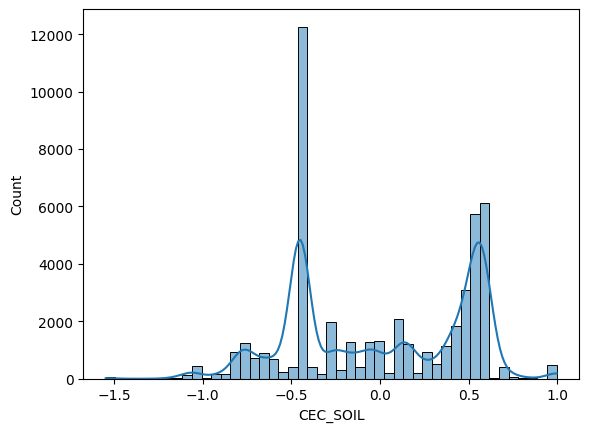

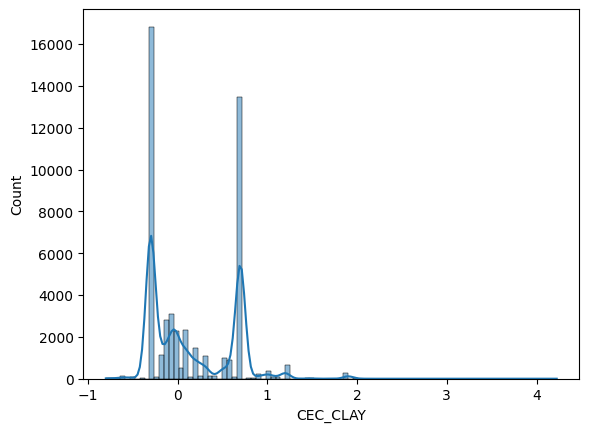

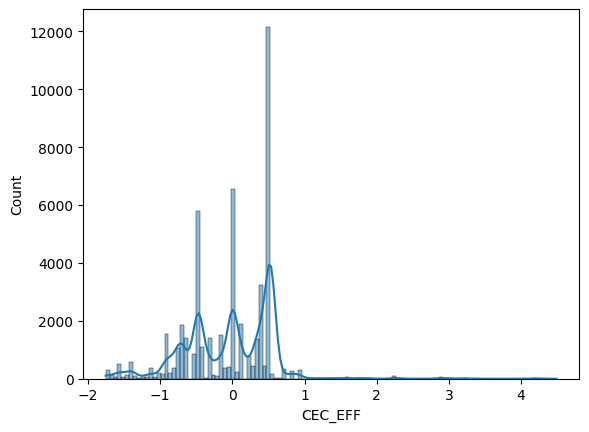

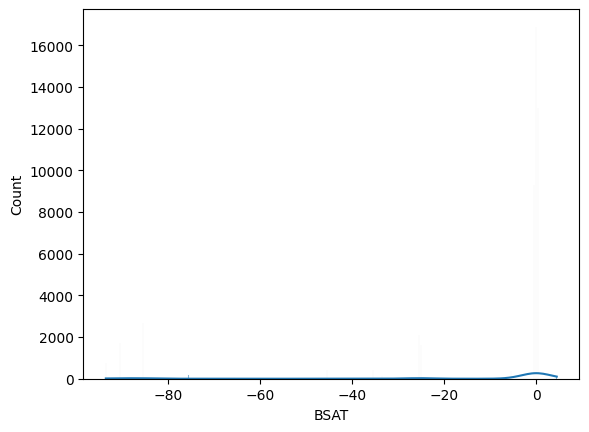

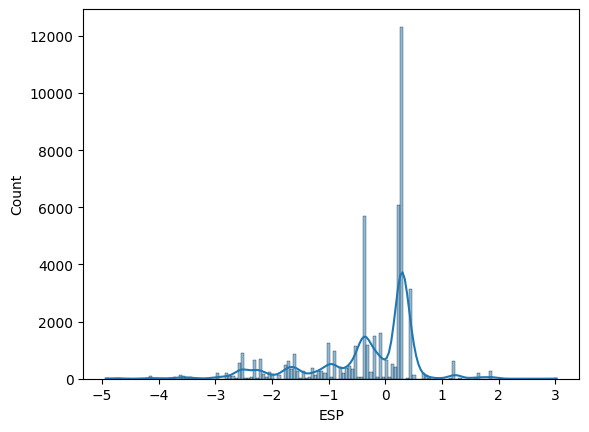

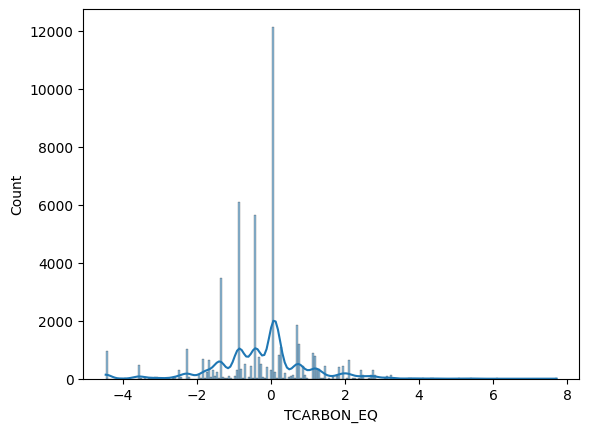

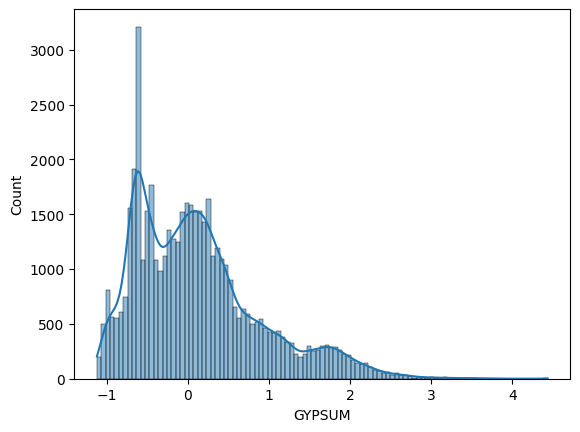

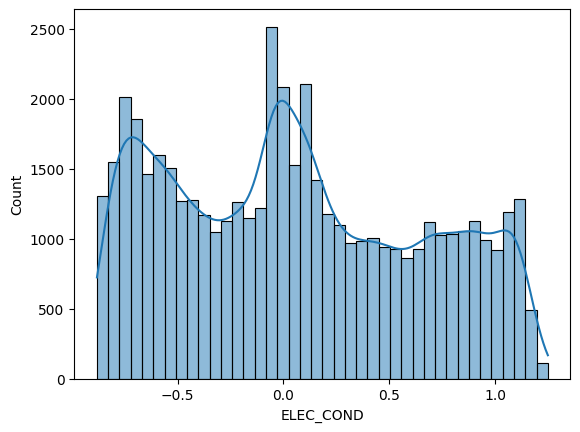

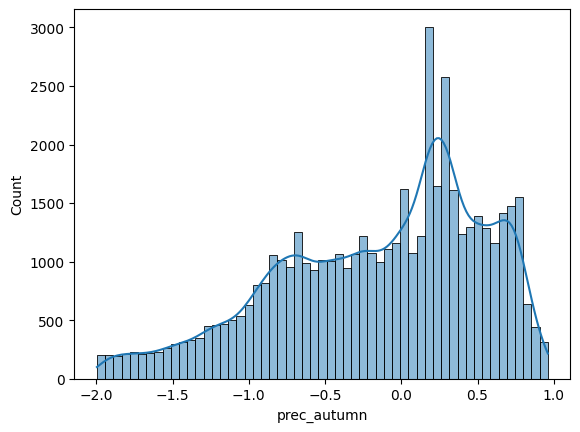

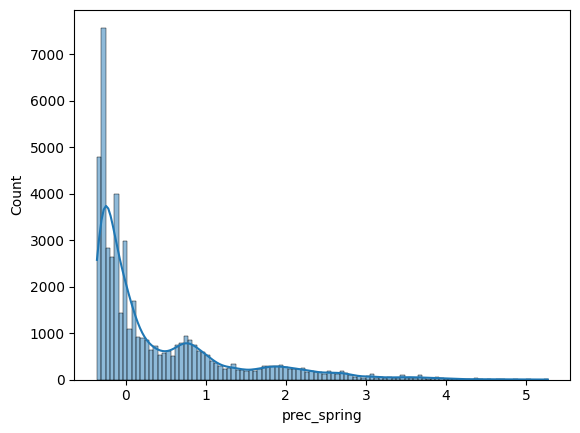

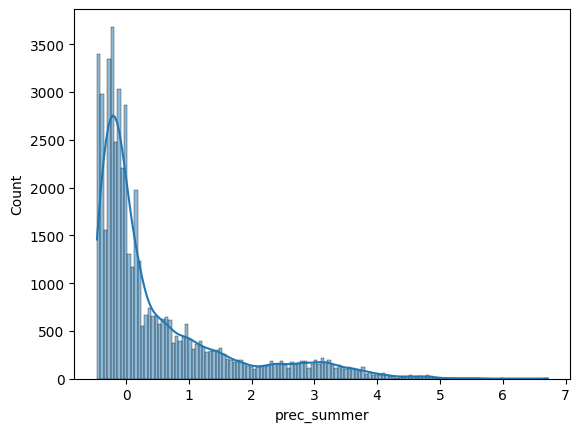

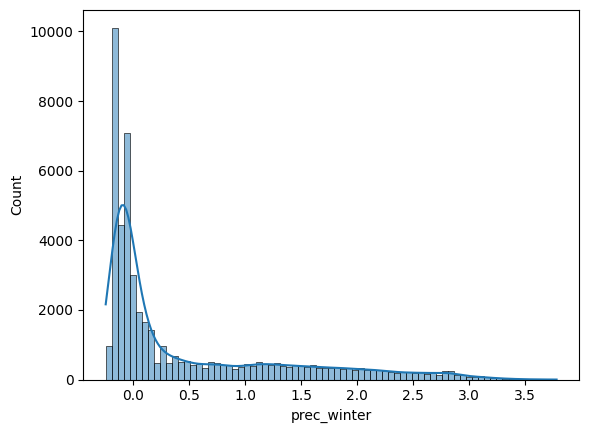

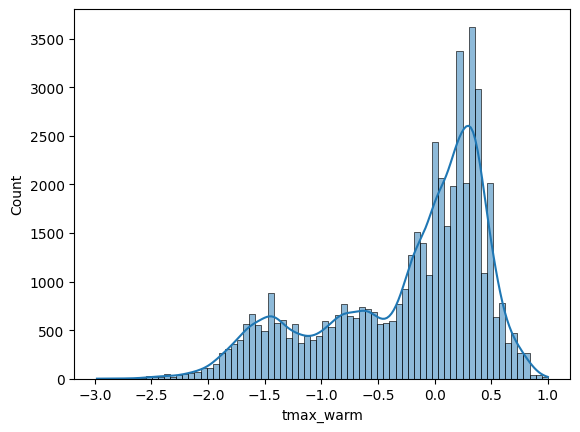

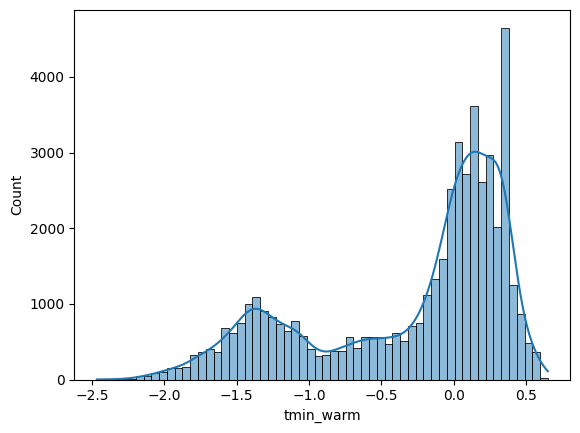

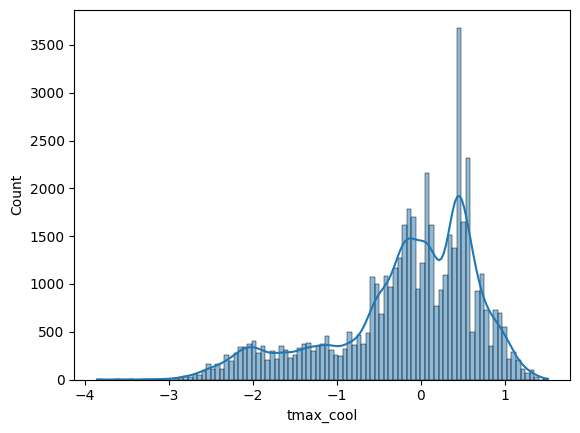

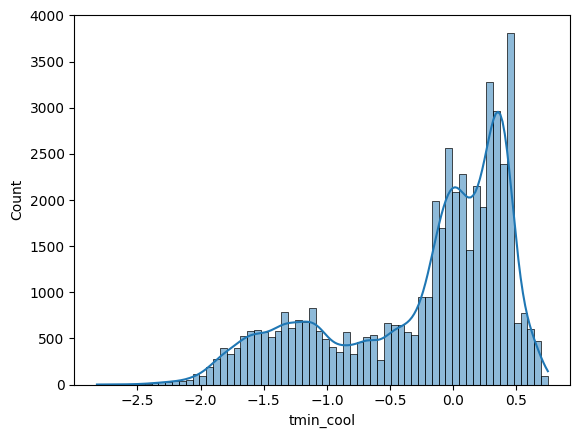

In [54]:
for col in X_train.columns:
  sns.histplot(data=X_train_scaled, x=col, kde=True)
  plt.show()

Robust scaler seems like the best fit

In [55]:
# scaler = RobustScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_train_scaled.head()

In [56]:
# X_train_scaled.describe()

# PCA

Before manual feature selection, let's check how many features would preserve 99% of the variance using PCA

5


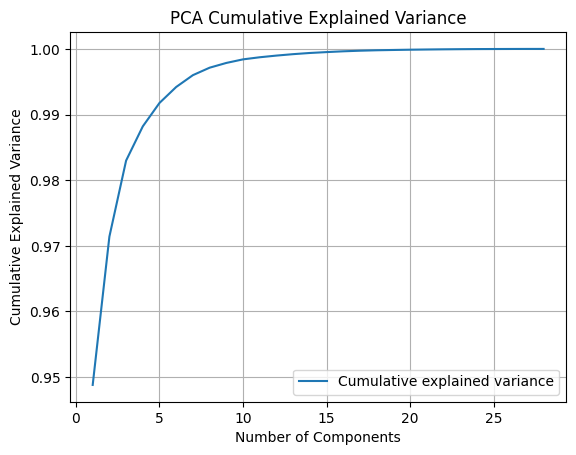

In [57]:
from sklearn.decomposition import PCA

pca_cumsum = PCA()
pca_cumsum.fit(X_train_scaled)
cumsum = np.cumsum(pca_cumsum.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.99) + 1
print(d)
# Code and method copied from HOML

plt.plot(range(1, cumsum.shape[0] + 1), cumsum, label='Cumulative explained variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

14 components would be enough according to PCA, maybe do more feature scaling

In [58]:
pca_14 = PCA(n_components=14)
X_train_pca = pca_14.fit_transform(X_train_scaled)

In [59]:
X_train_pca[:1,:]

array([[-15.84366959, -15.96398468,  11.91618077,   0.27432971,
          2.67573752,  -0.20641622,  -1.01392311,   0.50941972,
         -0.23728428,   1.86523966,   0.63146441,  -1.30948082,
          0.84194592,  -0.7501409 ]])

In [60]:
def transform_test_pipeline(X, preprocess):
  X = X.drop(columns=['TEXTURE_USDA', 'TEXTURE_SOTER', 'TEB', 'REF_BULK', 'SILT', 'ALUM_SAT'])

  tmax_cols = ['tmax_spring', 'tmax_summer', 'tmax_autumn', 'tmax_winter']
  tmin_cols = ['tmin_spring', 'tmin_summer', 'tmin_autumn', 'tmin_winter']

  # Warm season: Spring + Summer
  X['tmax_warm'] = X[['tmax_spring', 'tmax_summer']].mean(axis=1)
  X['tmin_warm'] = X[['tmin_spring', 'tmin_summer']].mean(axis=1)

  # Cool season: Autumn + Winter
  X['tmax_cool'] = X[['tmax_autumn', 'tmax_winter']].mean(axis=1)
  X['tmin_cool'] = X[['tmin_autumn', 'tmin_winter']].mean(axis=1)

  X = X.drop(columns=tmax_cols + tmin_cols)

  X_scaled = preprocess.transform(X)
  print(X_scaled)

  X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

  return X, X_scaled



In [61]:
X_test, X_test_scaled = transform_test_pipeline(X_test, preprocess)

[[-0.04212103 -0.61215866  0.         ...  0.27514079  0.16375546
   0.27746948]
 [ 0.43439978 -0.33664518  0.99999789 ... -0.01930813 -0.50873362
  -0.06437292]
 [-0.04212103 -0.61215866  0.         ...  0.08769107 -0.29039301
   0.04661487]
 ...
 [ 0.43439978 -0.33664518  0.99999789 ...  0.02011263 -0.49126638
  -0.16648169]
 [ 0.43439978 -0.33664518  0.99999789 ...  0.14159292 -0.10917031
  -0.00887902]
 [ 0.98766079 -2.19227776  2.37600745 ...  0.38213998  0.69213974
   0.51831299]]


# Saving Scaled and Non-scaled versions of train and test sets

In [62]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

X_test = pd.DataFrame(X_test)
X_train = pd.DataFrame(X_train)

X_test_scaled = pd.DataFrame(X_test_scaled)
X_train_scaled = pd.DataFrame(X_train_scaled)

In [68]:
y_train.to_csv('/content/drive/MyDrive/dm_fire_prediction/feature_engineering/v1/y_train.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/dm_fire_prediction/feature_engineering/v1/y_test.csv', index=False)

X_test.to_csv('/content/drive/MyDrive/dm_fire_prediction/feature_engineering/v1/X_test.csv', index=False)
X_train.to_csv('/content/drive/MyDrive/dm_fire_prediction/feature_engineering/v1/X_train.csv', index=False)

X_test_scaled.to_csv('/content/drive/MyDrive/dm_fire_prediction/feature_engineering/v1/X_test_scaled.csv', index=False)
X_train_scaled.to_csv('/content/drive/MyDrive/dm_fire_prediction/feature_engineering/v1/X_train_scaled.csv', index=False)